I scraped BetMGM's betting data for the NBA. They have data from the 2021-2022 season to the present.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
import scrape_yahoo

`load_summary_csv()` will load all the data I obtained directly from BetMGM via yahoo (no extra calculated fields added).

the data is obtained from first scraping yahoo's NBA daily results pages, extracting their internal game ID (which unfortunately is different from the NBA official API's game IDs.)

I then use the game ID in this internal API call: `f"https://sports.yahoo.com/site/api/resource/sports.graphite.gameOdds;dataType=graphite;endpoint=graphite;gameIds={game_id}"`

and then parsed using JSONPath expressions in `scrape_rules.py`.


In [3]:
df = scrape_yahoo.load_summary_csv()


wager_percentage and stake_percentage represent the percent of total wagers, and percent of total money wagered on each side of the bet, respectively.

In [4]:
df.describe()

,Unnamed: 0,total_over_points,total_over_stake_percentage,total_over_wager_percentage,total_over_odds,total_over_decimal_odds,total_under_points,total_under_stake_percentage,total_under_wager_percentage,total_under_odds,...,spread_away_points,spread_away_odds,spread_away_decimal_odds,spread_away_stake_percentage,spread_away_wager_percentage,spread_home_points,spread_home_odds,spread_home_decimal_odds,spread_home_stake_percentage,spread_home_wager_percentage
count,5273.0,5273.000000,4838.000000,4838.000000,5273.000000,5273.000000,5273.000000,4838.000000,4838.000000,5273.000000,...,5271.000000,5271.000000,5271.000000,4841.000000,4841.000000,5271.000000,5271.000000,5271.000000,4841.000000,4841.000000
mean,0.0,225.316234,78.234008,78.771104,-111.752702,1.901896,225.316234,21.766056,21.228896,-105.355206,...,2.229084,-108.306963,1.908638,53.332041,53.365013,-2.229084,-106.860937,1.913324,46.667959,46.634987
std,0.0,9.589383,12.301144,12.719378,23.423209,0.075538,9.589383,12.301252,12.719378,38.163711,...,7.048903,24.598666,0.046801,18.456487,18.833981,7.048903,27.642393,0.076976,18.456487,18.833981
min,0.0,195.500000,16.200000,15.350000,-600.000000,1.170000,195.500000,0.810000,1.210000,-300.000000,...,-18.500000,-600.000000,1.170000,3.180000,3.920000,-22.500000,-325.000000,1.300000,2.050000,2.740000
25%,0.0,218.500000,71.802500,72.420000,-110.000000,1.910000,218.500000,12.730000,11.842500,-110.000000,...,-3.500000,-115.000000,1.870000,40.110000,39.690000,-7.500000,-110.000000,1.910000,32.390000,31.560000
50%,0.0,225.500000,80.830000,81.865000,-110.000000,1.910000,225.500000,19.165000,18.135000,-110.000000,...,3.500000,-110.000000,1.910000,53.620000,53.680000,-3.500000,-110.000000,1.910000,46.380000,46.320000
75%,0.0,231.500000,87.270000,88.157500,-110.000000,1.910000,231.500000,28.202500,27.580000,-110.000000,...,7.500000,-110.000000,1.910000,67.610000,68.440000,3.500000,-105.000000,1.950000,59.890000,60.310000
max,0.0,261.500000,99.190000,98.790000,240.000000,3.400000,261.500000,83.800000,84.650000,425.000000,...,22.500000,260.000000,3.600000,97.950000,97.260000,18.500000,425.000000,5.250000,96.820000,96.080000


the wager_percentage/stake_percentage data is missing for around 435 games, but the different bet types (money/over-under/spread) are not all missing the same data. some have the over/under, but not the money data, for instance.

In [5]:
df.isna().sum()

Unnamed: 0                        0
game_date                         0
away_team                         0
home_team                         0
pregame_odds                      2
total_over_points                 0
total_over_stake_percentage     435
total_over_wager_percentage     435
total_over_odds                   0
total_over_decimal_odds           0
total_over_won                    0
total_under_points                0
total_under_stake_percentage    435
total_under_wager_percentage    435
total_under_odds                  0
total_under_decimal_odds          0
total_under_won                   0
money_away_odds                   0
money_away_decimal_odds           0
money_away_stake_percentage     434
money_away_wager_percentage     434
money_away_won                    0
money_home_odds                   0
money_home_decimal_odds           0
money_home_stake_percentage     434
money_home_wager_percentage     434
money_home_won                    0
spread_away_points          

# Exploring Spread Data

In [6]:
completed_game = ~df.spread_home_won.isna() # the game was completed, so there is a winner
has_spread_stake_percentage = ~df.spread_home_stake_percentage.isna()

df_has_spread = df.loc[completed_game & has_spread_stake_percentage].copy()

the spread_* fields are all non-null. a similar process would need to be done for total/money data analysis.

In [7]:
df_has_spread.isna().sum()

Unnamed: 0                      0
game_date                       0
away_team                       0
home_team                       0
pregame_odds                    2
total_over_points               0
total_over_stake_percentage     6
total_over_wager_percentage     6
total_over_odds                 0
total_over_decimal_odds         0
total_over_won                  0
total_under_points              0
total_under_stake_percentage    6
total_under_wager_percentage    6
total_under_odds                0
total_under_decimal_odds        0
total_under_won                 0
money_away_odds                 0
money_away_decimal_odds         0
money_away_stake_percentage     4
money_away_wager_percentage     4
money_away_won                  0
money_home_odds                 0
money_home_decimal_odds         0
money_home_stake_percentage     4
money_home_wager_percentage     4
money_home_won                  0
spread_away_points              0
spread_away_odds                0
spread_away_de

In [8]:
df = scrape_yahoo.add_spread_columns(df_has_spread)

this leaves data on 4840 games.

In [9]:
len(df)

4840

here's a sample row:

In [10]:
df.iloc[123]

Unnamed: 0                                        0
game_date                       2021-11-05 10:00:00
away_team                               New Orleans
home_team                              Golden State
pregame_odds                          -9.5, O/U 214
total_over_points                             214.0
total_over_stake_percentage                   68.22
total_over_wager_percentage                   72.33
total_over_odds                                -110
total_over_decimal_odds                        1.91
total_over_won                                False
total_under_points                            214.0
total_under_stake_percentage                  31.78
total_under_wager_percentage                  27.67
total_under_odds                               -110
total_under_decimal_odds                       1.91
total_under_won                                True
money_away_odds                                 350
money_away_decimal_odds                         4.5
money_away_s

## How often did the home team win against the spread?

We'd expect it to be 50%

In [11]:
df.spread_home_won.value_counts()

spread_home_won
False    2447
True     2393
Name: count, dtype: int64

the home team wins against the spread 49.5% of the time, so there is maybe a slight disadvantage taking them

In [12]:
2394 / len(df)

0.4946280991735537

Favorites and underdogs won almost exactly the same number of games against the spread. the lines are very fair in that sense.

In [13]:
df.spread_dog_won.value_counts()

spread_dog_won
False    2427
True     2413
Name: count, dtype: int64

the AWAY team is more likely to be the underdog, about 5/8 of the time

In [14]:
df.spread_dog.value_counts()

spread_dog
AWAY    3044
HOME    1796
Name: count, dtype: int64

In [15]:
df.spread_dog.value_counts()['AWAY'] /  len(df)

np.float64(0.6289256198347107)

## How did popular/public teams do against the spread?

First, some betting jargon. Teams that are popular with bettors are known as *public* teams. The more popular side is known as the *public side*. Betting the less popular side is known as *fading the public*. When the less popular side wins against the spread, people will say *Vegas won* or *sharps won* (a *sharp* is someone who is good at betting)

Looking at the stake/wager data, we can find out which team was more popular to bet on for each game. How do those *public* teams do collectively?

This is very interesting to me: the public tends to favor the AWAY team 56.6% of the time, which is a pretty healthy margin.

In [16]:
df.spread_most_popular.value_counts()

spread_most_popular
AWAY    2742
HOME    2098
Name: count, dtype: int64

In [17]:
df.spread_most_popular.value_counts()['AWAY'] / len(df)

np.float64(0.5665289256198347)

overall, the public did worse than a coin flip.

pardon the following copy/paste from another notebook

In [18]:
df.spread_popular_won.value_counts()

spread_popular_won
False    2459
True     2381
Name: count, dtype: int64

In [19]:
from scipy.stats import norm
def win_loss_report(wins, losses, vig=1.1):
    win_pct = wins / (wins+losses)
    expected_wins = (wins + losses) /2
    std = np.sqrt(wins + losses)/2 # sqrt(n*p*(1-p)) = sqrt(n * .5 * .5) = sqrt(n)/2
    z_score = (wins-expected_wins) / std
    p_value = norm.cdf(z_score)
    profit_pct = 100 * (win_pct - (vig * (1-win_pct)))

    betting_market = (.97*wins) - (1.017 * losses)

    print(f"record:   {wins} - {losses}")
    if vig != 1.1:
        print(f"actual ({vig} vig) units: { round(wins - (vig*losses), 2)}")
    
    print(f"full vig (-110) units: { round(wins - (1.1*losses),2) }")
    print(f"reduced juice (-106) : { round(wins - (1.06 * losses),2) }")
    print(f"reduced juice (-105) : { round(wins - (1.05 * losses),2) }")
    print(f"betting market       : { round(betting_market, 2) }")

    print(f"win pct: {round(100 *win_pct,2)}%, expected wins: {expected_wins}")
    print(f"excess: {wins - expected_wins}, profit %: {round(profit_pct,2)}")
    print(f"z test: {round(z_score,2)}, std: {round(std,2)} , p-value: {round(1-p_value, 4)}")

So the public wins 49.19% of games. that's bad, but very possible due to chance alone. (z=-1.12)

Someone always betting the popular side would have lost 324 units over the past 4 seasons.

In [61]:
win_loss_report(2381,2459)

record:   2381 - 2459
full vig (-110) units: -323.9
reduced juice (-106) : -225.54
reduced juice (-105) : -200.95
betting market       : -191.23
win pct: 49.19%, expected wins: 2420.0
excess: -39.0, profit %: -6.69
z test: -1.12, std: 34.79 , p-value: 0.8689


someone always *fading the public* (taking the unpopular side) would only lose about 160 units. they have a positive winning percentage, but not high enough to overcome the vig.

In [62]:
win_loss_report(2459, 2381)

record:   2459 - 2381
full vig (-110) units: -160.1
reduced juice (-106) : -64.86
reduced juice (-105) : -41.05
betting market       : -36.25
win pct: 50.81%, expected wins: 2420.0
excess: 39.0, profit %: -3.31
z test: 1.12, std: 34.79 , p-value: 0.1311


## Who likes dogs?

How often is the underdog the most popular team with gamblers at BetMGM?

In [22]:
df.spread_popular_underdog.value_counts()


spread_popular_underdog
False    2732
True     2108
Name: count, dtype: int64

The favorite is the most popular side with bettors 56.4% of the time

In [23]:
df.spread_popular_underdog.value_counts()[False] / len(df)

np.float64(0.5644628099173554)

the public tends to take AWAY and FAVORITEs. let's see how the number of bets break down:

In [24]:
print(pd.crosstab(df.spread_most_popular, df.spread_popular_underdog).to_markdown())

| spread_most_popular   |   False |   True |
|:----------------------|--------:|-------:|
| AWAY                  |    1215 |   1527 |
| HOME                  |    1517 |    581 |


home dogs are way less popular than the other combinations. in case the crosstab isn't clear, the numbers for the popular side of the bet are:

* AWAY + underdog = 1527 bets
* HOME + favorite = 1517
* AWAY + favorite = 1215
* HOME + underdog = 581

How often do each category win?

In [25]:
popular_home_dogs = df.loc[(df.spread_most_popular == 'HOME') & (df.spread_popular_underdog)]
popular_home_faves = df.loc[(df.spread_most_popular == 'HOME') & (~df.spread_popular_underdog)]

popular_road_dogs = df.loc[(df.spread_most_popular == 'AWAY') & (df.spread_popular_underdog)]
popular_road_faves =  df.loc[(df.spread_most_popular == 'AWAY') & (~df.spread_popular_underdog)]

popular home underdogs win around 50% of the time

In [26]:
popular_home_dogs.spread_home_won.value_counts()

spread_home_won
False    292
True     289
Name: count, dtype: int64

popular home favorites do atrociously, with a 47.9% winning percentage

In [27]:
popular_home_faves.spread_home_won.value_counts()

spread_home_won
False    790
True     727
Name: count, dtype: int64

In [28]:
win_loss_report(727,792)

record:   727 - 792
full vig (-110) units: -144.2
reduced juice (-106) : -112.52
reduced juice (-105) : -104.6
betting market       : -100.27
win pct: 47.86%, expected wins: 759.5
excess: -32.5, profit %: -9.49
z test: -1.67, std: 19.49 , p-value: 0.9523


popular home favorites are bad enough that taking the opposite bets -- unpopular road dogs -- would be (slightly) profitable at reduced juice (risk 106 to win 100 rather than risk 110). 

a big caveat here is gambling is stupid, don't do it, it doesn't make you look cool, etc. The other caveat is that reduced juice sportsbooks tend to have sharper (more accurate) lines than a sportsbook like BetMGM, the source of this data. so the winning percentage would probably not be as high.

In [29]:
win_loss_report(792,727)

record:   792 - 727
full vig (-110) units: -7.7
reduced juice (-106) : 21.38
reduced juice (-105) : 28.65
betting market       : 28.88
win pct: 52.14%, expected wins: 759.5
excess: 32.5, profit %: -0.51
z test: 1.67, std: 19.49 , p-value: 0.0477


popular road dogs are also pretty bad, with a 48.6% winning percentage

In [30]:
popular_road_dogs.spread_away_won.value_counts()

spread_away_won
False    785
True     742
Name: count, dtype: int64

In [31]:
win_loss_report(742, 785)

record:   742 - 785
full vig (-110) units: -121.5
reduced juice (-106) : -90.1
reduced juice (-105) : -82.25
betting market       : -78.6
win pct: 48.59%, expected wins: 763.5
excess: -21.5, profit %: -7.96
z test: -1.1, std: 19.54 , p-value: 0.8644


betting unpopular home favorites across the board is basically break-even when betting reduced juice

In [32]:
win_loss_report(785, 742)

record:   785 - 742
full vig (-110) units: -31.2
reduced juice (-106) : -1.52
reduced juice (-105) : 5.9
betting market       : 6.84
win pct: 51.41%, expected wins: 763.5
excess: 21.5, profit %: -2.04
z test: 1.1, std: 19.54 , p-value: 0.1356


surprisingly, popular road favorites had a winning record (51.3%) against the spread (but not profitable at a sportsbook like MGM Grand due to the vig)

In [33]:
popular_road_faves.spread_away_won.value_counts()

spread_away_won
True     623
False    592
Name: count, dtype: int64

In [63]:
win_loss_report(623, 592)

record:   623 - 592
full vig (-110) units: -28.2
reduced juice (-106) : -4.52
reduced juice (-105) : 1.4
betting market       : 2.25
win pct: 51.28%, expected wins: 607.5
excess: 15.5, profit %: -2.32
z test: 0.89, std: 17.43 , p-value: 0.1869


the two least frequent bet types (popular road favorites and popular home underdogs) had the best winning percentages.

unpopular home favorites and unpopular road underdogs also have >50% winning percentages.

## What do spreads look like?

first thing to note is that spreads of +/-1 point or less are extremely rare. there are Basketball Reasons for this.

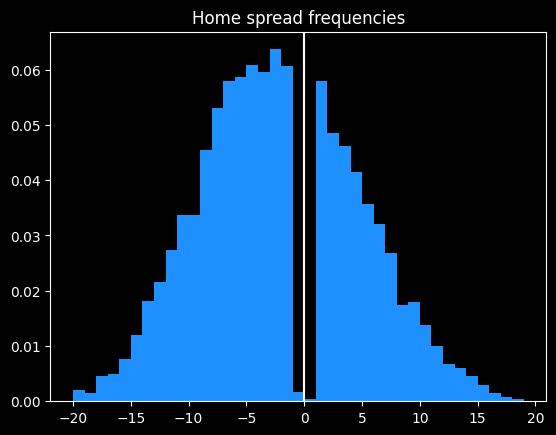

In [35]:
plt.hist(df.spread_home_points, color='dodgerblue', bins=range(-20,20), density=True)
_out = plt.title("Home spread frequencies")
_out = plt.axvline(0, color='white')

spreads on the whole point (eg -8) are also extremely rare for this sportsbook. almost all are on the half point (eg -8.5)

spreads in the -1.5 to -4.5 range for the home team are most common.

In [36]:
df.spread_home_points.value_counts()

spread_home_points
-2.5     302
-1.5     289
-4.5     288
-3.5     283
 1.5     277
        ... 
 0.5       2
-11.0      1
 8.0       1
-21.5      1
-22.5      1
Name: count, Length: 63, dtype: int64

can we calculate the generic home court advantage? the mean is -2.2

In [37]:
df.spread_home_points.describe()

count    4840.000000
mean       -2.200310
std         7.075035
min       -22.500000
25%        -7.500000
50%        -3.500000
75%         3.500000
max        18.500000
Name: spread_home_points, dtype: float64

that's misleading, though; the median is -3.5, so the distribution is slightly skewed.

In [38]:
df.spread_home_points.median()

np.float64(-3.5)

In [39]:
df.spread_home_points.skew()

np.float64(0.2005636921549586)

4763 of 4844 games (98.3%) are on the half point. the lines are intentionally not perfect, because sportsbooks hate when a bet ends in a PUSH (neither side wins and both sides get their money refunded, meaning the sportsbook makes nothing)

In [40]:
sum(df.spread_home_points.astype("str").str.endswith(".5"))

4759

In [41]:
len(df)

4840

In [42]:
4763/4844

0.9832782824112304

## Which teams are most frequently the favorite?

In [43]:
### TODO move this stuff to the scrape_yahoo file

## add spread favorite/underdog team name
df['spread_favorite_team_name'] = None
df['spread_dog_team_name'] = None
# home favorites

# the home team was the favorite on the line
home_favorites = (df.spread_dog == "AWAY")
df.loc[home_favorites, "spread_favorite_team_name"] = df.loc[home_favorites, "home_team"]
df.loc[home_favorites, "spread_dog_team_name"] = df.loc[home_favorites, "away_team"]


away_favorites = (df.spread_dog == "HOME")
df.loc[away_favorites, "spread_favorite_team_name"] = df.loc[away_favorites, "away_team"]
df.loc[away_favorites, "spread_dog_team_name"] = df.loc[away_favorites, "home_team"]

# spread winner/loser team names
df['spread_winner_team_name'] = None
df['spread_loser_team_name'] =  None

spread_home_winners = (df.spread_home_won == True)
spread_home_losers = (df.spread_home_won == False)

df.loc[spread_home_winners, 'spread_winner_team_name'] = df.loc[spread_home_winners, 'home_team']
df.loc[spread_home_winners, 'spread_loser_team_name'] = df.loc[spread_home_winners, 'away_team']


df.loc[spread_home_losers, 'spread_winner_team_name'] = df.loc[spread_home_losers, 'away_team']
df.loc[spread_home_losers, 'spread_loser_team_name'] = df.loc[spread_home_losers, 'home_team']




### what are teams' winning percentages against the spread over the past 4 years?

In [44]:
# this will vary between teams because we're counting playoff games
num_games = df.spread_winner_team_name.value_counts() + df.spread_loser_team_name.value_counts()

## win percents against the spread
win_pcts_ats = (df.spread_winner_team_name.value_counts() / num_games) 

win_pcts_ats.sort_values(ascending=True)

Washington       0.438538
Atlanta          0.441640
Phoenix          0.471471
New Orleans      0.476341
Portland         0.476821
Brooklyn         0.483444
Milwaukee        0.484375
Charlotte        0.486842
San Antonio      0.488449
LA Clippers      0.489231
Sacramento       0.490385
Denver           0.491429
Utah             0.491749
Detroit          0.495146
Minnesota        0.495601
Philadelphia     0.498489
Miami            0.498525
LA Lakers        0.500000
Houston          0.501629
Indiana          0.502959
Golden State     0.504399
New York         0.504425
Cleveland        0.507645
Dallas           0.514881
Chicago          0.516129
Orlando          0.528302
Memphis          0.529231
Boston           0.540166
Toronto          0.543689
Oklahoma City    0.593373
Name: count, dtype: float64

OKC's 59.3% winning percentage against the spread is really remarkable on a sample size of 332 games.

In [45]:
num_games['Oklahoma City']

np.int64(332)

we can calculate a reasonable range of values for the win percentages

In [46]:
std_err = (1/2) / np.sqrt(332)

In [47]:
print(f"reasonable range: {.5 - (1.96 *std_err)} to {.5 + (1.96 * std_err)}")

reasonable range: 0.4462155126050517 to 0.5537844873949482


In [48]:
df.spread_dog_team_name.value_counts()

spread_dog_team_name
Detroit          251
Charlotte        245
San Antonio      238
Washington       237
Portland         228
Houston          212
Orlando          204
New Orleans      195
Indiana          184
Toronto          181
Utah             180
Brooklyn         178
Chicago          178
LA Lakers        161
Atlanta          159
Dallas           154
Oklahoma City    147
New York         145
Sacramento       145
Philadelphia     143
Memphis          143
Minnesota        138
LA Clippers      134
Miami            133
Phoenix          103
Denver           101
Golden State     100
Cleveland         96
Milwaukee         85
Boston            42
Name: count, dtype: int64

In [49]:
df.spread_favorite_team_name.value_counts()

spread_favorite_team_name
Boston           319
Denver           249
Golden State     241
Milwaukee        235
Cleveland        231
Phoenix          230
Miami            206
Minnesota        203
New York         194
LA Clippers      191
Philadelphia     188
Oklahoma City    185
Dallas           182
Memphis          182
Sacramento       167
LA Lakers        167
Atlanta          158
Indiana          154
Chicago          132
Toronto          128
Brooklyn         124
Utah             123
New Orleans      122
Orlando          114
Houston           95
Portland          74
San Antonio       65
Washington        64
Charlotte         59
Detroit           58
Name: count, dtype: int64

### Who are the most common public teams? Who do the public like?

In [50]:
df['spread_popular_team_name'] = None

popular_home = (df.spread_most_popular == "HOME")

df.loc[popular_home, 'spread_popular_team_name'] = df.loc[popular_home, 'home_team']
df.loc[~popular_home, 'spread_popular_team_name'] = df.loc[~popular_home, 'away_team']


Who is the most popular team with the public?

The Lakers, are like, rilly, rilly, rilly popular, as are the Warriors

This is a little surprising because sports betting isn't legal in California. It's not very surprising because they are nationally popular.

The other top teams have all had success lately and/or have one of the best players. Memphis and Chicago are the first surprising ones. Neither one has been all that great.

Charlotte/Portland/New Orleans/Detroit/Orlando have all been bummer teams for the past 4 years, for the most part.

In [51]:
team_popularity = df.spread_popular_team_name.value_counts() / num_games
team_popularity.round(3).sort_values(ascending=False)

LA Lakers        0.716
Golden State     0.716
Milwaukee        0.694
Phoenix          0.607
Denver           0.603
Dallas           0.577
Boston           0.557
Memphis          0.551
Chicago          0.545
Indiana          0.541
Philadelphia     0.538
Cleveland        0.520
Miami            0.519
Utah             0.518
Oklahoma City    0.518
Minnesota        0.504
LA Clippers      0.502
Brooklyn         0.497
Atlanta          0.495
New York         0.484
San Antonio      0.436
Washington       0.425
Sacramento       0.417
Houston          0.401
Toronto          0.382
Charlotte        0.359
Portland         0.341
New Orleans      0.322
Detroit          0.314
Orlando          0.311
Name: count, dtype: float64

Let's look at win % ATS versus team popularity. teams that consistently win > 50% of the time against the spread should be more popular with bettors. the top right and lower left quadrants should have more dots than the other two quadrants, and they do -- there is a slight positive correlation between the winning percentages.

Oklahoma City is the clear outlier, with by far the best win percentage but only slightly above average popularity.

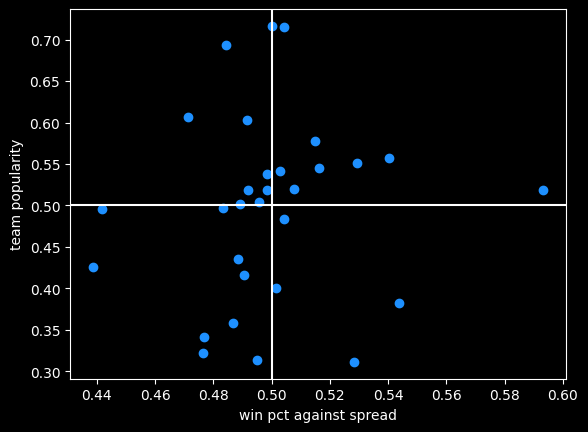

In [52]:
plt.scatter(win_pcts_ats, team_popularity, color="dodgerblue")
_out = plt.axvline(.5, color='white')
_out = plt.ylabel("team popularity")

_out = plt.axhline(.5, color="white")
_out = plt.xlabel("win pct against spread") 

bettors are mildly rational as a whole -- *the public* slightly prefer teams with a better record against the spread. yet they still manage to have a losing record overall.


In [53]:
win_pcts_ats.corr(team_popularity)

np.float64(0.08150480880667522)

## Money money money, money

### What are the average money line odds? do they match the win rate for underdog teams?


### is there more value on underdogs or favorites on the money line?

with the decimal odds, a value > 2 means you win more than you risk. the mean decimal odds on the home team is > 2, because the distribution is skewed.

In [54]:
df.money_home_decimal_odds.describe()


count    4840.000000
mean        2.076260
std         1.266215
min         1.010000
25%         1.330000
50%         1.670000
75%         2.350000
max        12.000000
Name: money_home_decimal_odds, dtype: float64

the median odds are 1.67 -- risk $100 to win $67. we really can't treat the decimal odds like they're normally distributed. (for one thing, the minimum value is a little over 1, like 1.01 -- meaning risk $100 to win $1).

<Axes: >

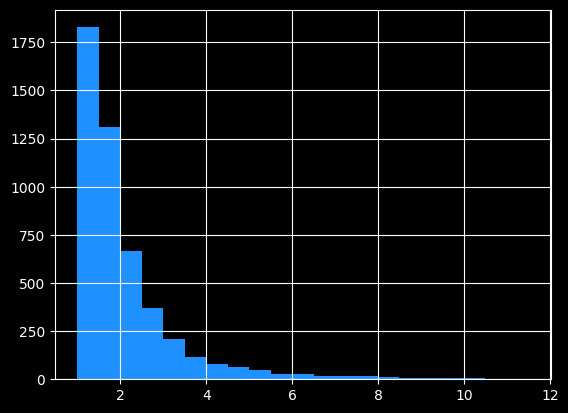

In [55]:
df.money_home_decimal_odds.hist(color='dodgerblue', bins=np.arange(1,12,.5))


In [56]:
df.money_home_decimal_odds.median()

np.float64(1.67)

around 65% of money lines have the home team as a true favorite (you have to risk more than you win)

In [57]:
len(df[df.money_home_decimal_odds < 2]) / len(df)

0.6483471074380165

Are underdogs or favorites more profitable to the sportsbook?

(this is called the longshot bias -- supposedly heavy underdogs get worse odds than heavy favorites)

In [58]:
df.iloc[10]

Unnamed: 0                                        0
game_date                       2021-10-20 10:00:00
away_team                                Washington
home_team                                   Toronto
pregame_odds                        -2.5, O/U 223.5
total_over_points                             223.5
total_over_stake_percentage                   78.63
total_over_wager_percentage                   75.33
total_over_odds                                -110
total_over_decimal_odds                        1.91
total_over_won                                False
total_under_points                            223.5
total_under_stake_percentage                  21.37
total_under_wager_percentage                  24.67
total_under_odds                               -110
total_under_decimal_odds                       1.91
total_under_won                                True
money_away_odds                                 115
money_away_decimal_odds                        2.15
money_away_s

In [59]:
## ugly code, forgive me plz

# assume we're risking 100 on every bet

# what if we bet all favorites?
# assume $100 a bet
net_profit = 0
games_bet = 0
for idx, game in df.iterrows():
    if game.money_home_odds < 0:
        ## home team favorite
        if game.money_home_won:
            # if line is -140, risk 100 to win 100/140
            net_profit = net_profit + (100 * (100 / np.abs(game.money_home_odds)))
        
        else:
            net_profit = net_profit - 100
        games_bet +=1
    elif game.money_away_odds < 0:
        if game.money_away_won:
            net_profit = net_profit + (100 * (100 / np.abs(game.money_away_odds)))
        else:
            net_profit = net_profit - 100
        games_bet +=1


print(f"net profit on all {games_bet} favorites moneyline is {net_profit}, per game {net_profit/games_bet}")


# what if we bet just mild favorites? (> -200)
# assume $100 a bet
net_profit = 0
games_bet = 0
for idx, game in df.iterrows():
    if (game.money_home_odds < 100) and (game.money_home_odds > -200):
        ## home team favorite
        if game.money_home_won:
            # if line is -140, risk 100 to win 100/140
            net_profit = net_profit + (100 * (100 / np.abs(game.money_home_odds)))
        
        else:
            net_profit = net_profit - 100
        games_bet +=1
    elif (game.money_away_odds < 100) and (game.money_away_odds > -200):
        if game.money_away_won:
            net_profit = net_profit + (100 * (100 / np.abs(game.money_away_odds)))
        else:
            net_profit = net_profit - 100
        games_bet +=1
print(f"net profit on all {games_bet} mild favorites (> -200) moneyline is {net_profit}, per game {net_profit/games_bet}")

# what if we bet all heavy favorites?
# assume $100 a bet
net_profit = 0
games_bet = 0
for idx, game in df.iterrows():
    if game.money_home_odds < -400:
        ## home team favorite
        if game.money_home_won:
            # if line is -140, risk 100 to win 100 * 100/140
            net_profit = net_profit + (100 * (100 / np.abs(game.money_home_odds)))
        
        else:
            net_profit = net_profit - 100
        games_bet +=1
    elif game.money_away_odds < -400:
        if game.money_away_won:
            net_profit = net_profit + (100 * (100 / np.abs(game.money_away_odds)))
        else:
            net_profit = net_profit - 100
        games_bet +=1
print(f"net profit on all {games_bet} heavy favorites < -400 moneyline is {net_profit}, per game {net_profit/games_bet}")

print(">" * 40)

# what if we bet all underdogs?
net_profit = 0
games_bet = 0
for idx, game in df.iterrows():
    if game.money_home_odds > 0:
        ## home team dog
        if game.money_home_won:
            net_profit = net_profit + game.money_home_odds
        else:
            net_profit = net_profit - 100
        games_bet +=1

    elif game.money_away_odds > 0:
        if game.money_away_won:
            net_profit = net_profit + game.money_away_odds
        else:
            net_profit = net_profit - 100
        games_bet +=1
        
print(f"net profit on all {games_bet} dogs moneyline is {net_profit}, per game bet {net_profit/games_bet}")

# what if we bet all mild underdogs?
net_profit = 0
games_bet = 0
for idx, game in df.iterrows():
    if game.money_home_odds > 0 and (game.money_home_odds < 200):
        ## home team dog
        if game.money_home_won:
            net_profit = net_profit + game.money_home_odds
        else:
            net_profit = net_profit - 100
        games_bet +=1

    elif game.money_away_odds > 0 and (game.money_away_odds < 200):
        if game.money_away_won:
            net_profit = net_profit + game.money_away_odds
        else:
            net_profit = net_profit - 100
        games_bet +=1
        
print(f"net profit on {games_bet} mild dogs moneyline is {net_profit}, per game bet {net_profit/games_bet}")




# what if we bet all heavy underdogs?
net_profit = 0
games_bet = 0
for idx, game in df.iterrows():
    if game.money_home_odds > 200:
        ## home team dog
        if game.money_home_won:
            net_profit = net_profit + game.money_home_odds
        else:
            net_profit = net_profit - 100
        games_bet +=1

    elif game.money_away_odds > 200:
        if game.money_away_won:
            net_profit = net_profit + game.money_away_odds
        else:
            net_profit = net_profit - 100
        games_bet +=1
        
print(f"net profit on {games_bet} big dogs (> +200) moneyline is {net_profit}, per game bet {net_profit/games_bet}")

# what if we bet all super heavy underdogs?
net_profit = 0
games_bet = 0
for idx, game in df.iterrows():
    if game.money_home_odds > 400:
        ## home team dog
        if game.money_home_won:
            net_profit = net_profit + game.money_home_odds
        else:
            net_profit = net_profit - 100
        games_bet +=1

    elif game.money_away_odds > 400:
        if game.money_away_won:
            net_profit = net_profit + game.money_away_odds
        else:
            net_profit = net_profit - 100
        games_bet +=1
        
print(f"net profit on {games_bet} heavy dogs (> +400) moneyline is {net_profit}, per game bet {net_profit/games_bet}")

net profit on all 4840 favorites moneyline is -19798.740201105345, per game -4.09064880188127
net profit on all 2033 mild favorites (> -200) moneyline is -7767.93869287508, per game -3.820924098807221
net profit on all 1054 heavy favorites < -400 moneyline is -5889.841797693195, per game -5.588085197052367
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
net profit on all 4634 dogs moneyline is -25346, per game bet -5.469572723349159
net profit on 2440 mild dogs moneyline is -13655, per game bet -5.596311475409836
net profit on 2027 big dogs (> +200) moneyline is -9091, per game bet -4.484953132708436
net profit on 665 heavy dogs (> +400) moneyline is -4650, per game bet -6.992481203007519


expected value for a traditional risk 110 to win 100

In [60]:
(.5 * 100 - (.5 * 110)) / 110

-0.045454545454545456